[3112.748465589234, 3111.9694859002016, 3095.8842291537344]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: MimosaPlots


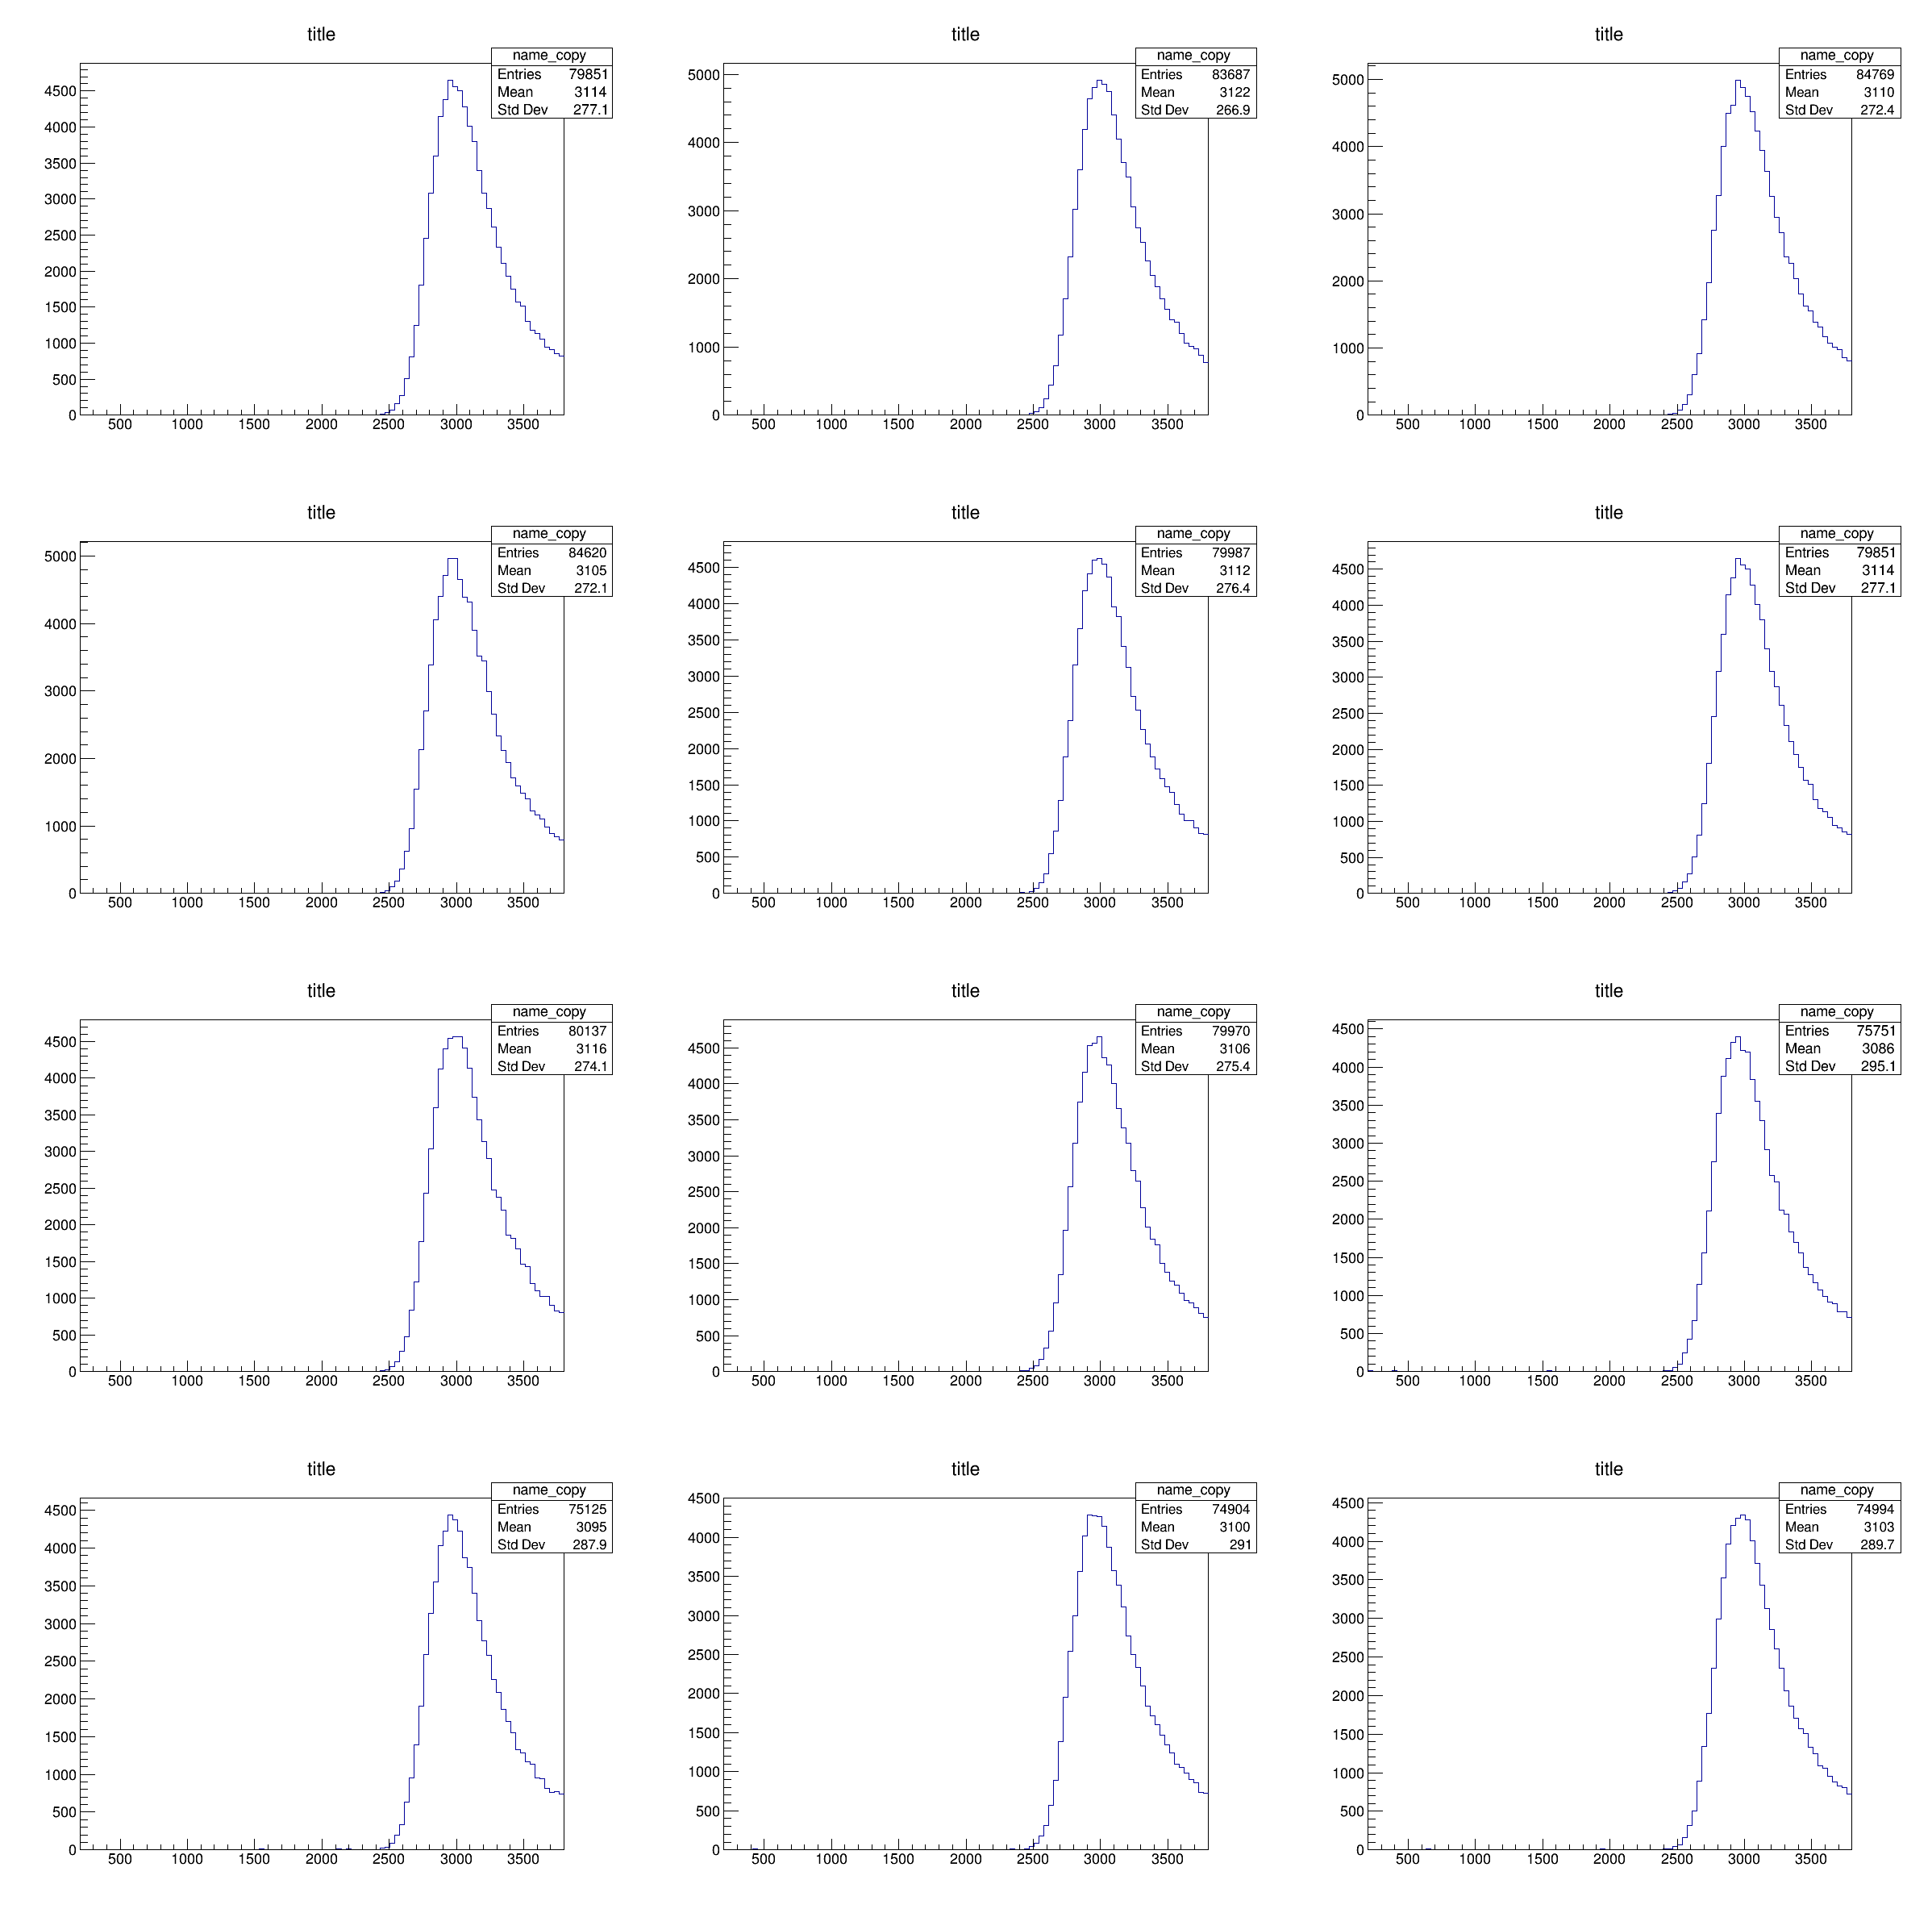

In [3]:
#draw histograms for all the 1cm EJ-200 electron runs at different energies (they come in sets of 4)
#i.e. for each (scintillator, energy) pair we have 4 runs with varying BRM amperage between them
#because BRM shouldn't affect scintillator <-> energy, it really just means we have 4x runs per (scintillator, energy), so I average them

from ROOT import TFile, TCanvas, TH1D
import numpy as np
runNumbers=["1571933143", "1571931737", "1571932015", "1571932325", "1571932668", "1571933143", "1571933521", "1571933929", "1571934315", "1571934931", "1571935652", "1571936276", "1571936885", "1571937854", "1571938197", "1571938501", "1571938794", "1571939126", "1571939524", "1571939912", "1571950010", "1571950464", "1571950975", "1571951573", "1571952203", "1571952846", "1571953473"]
runNumbersE=["1571933143", "1571932668", "1571934315",  "1571937854", "1571939524", "1571950975"] #each run is from a different energy

iterat=1

maxum=12
c1=TCanvas("MimosaPlots", "MimosaPlots", 2400, 2400)
c1.Divide(3, 4)

scintMeans=[]
holdScint=[]

listOhists=[]

#for run in [i for i in runNumbers[::-1]]:
for run in runNumbers:
#for i in range(0,1):

    c1.cd(iterat)    
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH1D("name", "title", 100, 200, 3800)
    #listOhists+=[TH1D("name" + str(iterat), "title", 100, 200, 3800)]
    #RAWdata.Draw("QDC0_ch0>>name" + str(iterat), "QDC0_ch0<3800 && QDC0_ch0>200")
    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.DrawCopy() #since it's all the same histogram, if we just Draw() it will erase the old one
    #listOhists[iterat-1].DrawCopy()
    #RAWdata.Draw("QDC0_ch0")
    #holdScint+=[listOhists[iterat-1].GetMean()]
    holdScint+=[hist1.GetMean()]
    if iterat%4==0:
        scintMeans+=[np.mean(holdScint)]
        holdScint=[]
    iterat+=1
    if iterat>maxum:
        break
    
c1.Draw()
print(scintMeans)

1666.2356407777972
 FCN=2810.83 FROM MIGRAD    STATUS=CONVERGED     209 CALLS         210 TOTAL
                     EDM=2.83771e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.16376e+04   2.15029e+02   3.52141e+00  -1.99943e-07
   2  MPV          1.66624e+03   5.89132e-01   1.43774e-02   4.22504e-04
   3  Sigma        1.06454e+02   3.67190e-01   8.71315e-06  -1.53979e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: MimosaPlots


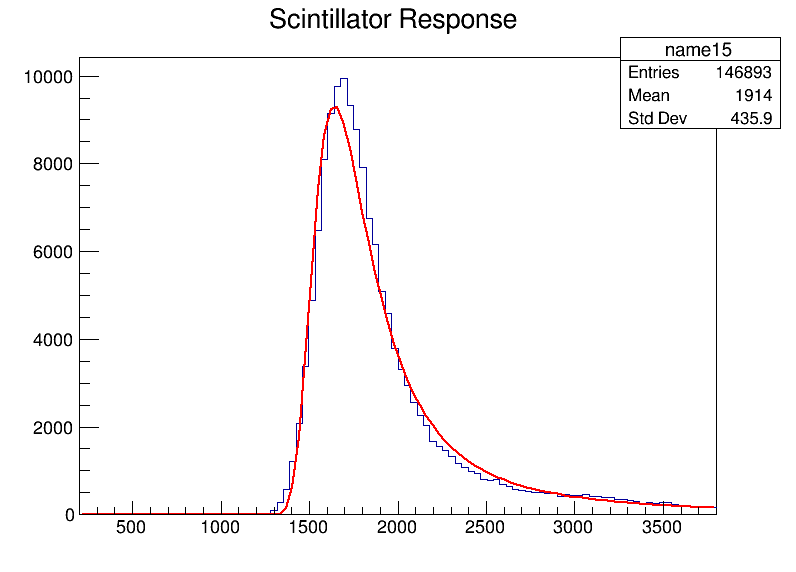

In [4]:
#Paul suggests that rather than getting the mean we can fit it to a distribution

from ROOT import TF1
runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572013337.root"
importFile = TFile(runName, "READ")
RAWdata=importFile.Get("RAWdata")
c2=TCanvas("MimosaPlots", "MimosaPlots", 800, 600)
hist1=TH1D("name15", "Scintillator Response", 100, 200, 3800)
RAWdata.Draw("QDC0_ch0>>name15", "QDC0_ch0>200 && QDC0_ch0<3800")
hist1.Draw()

fitti=TF1("fitti", "landau") #the distribution in this sense is the Landau distribution

hist1.Fit(fitti) #Paul suggests eventually getting a better fit by mushing together landau and gaussian
print(fitti.GetParameter("MPV")) #and MPV refers to the peak

c2.Draw()

[(2981.4050178942307, 3112.748465589234), (2981.125329646396, 3111.9694859002016), (2965.448979996993, 3095.8842291537344)]
 FCN=681.331 FROM MIGRAD    STATUS=CONVERGED     122 CALLS         123 TOTAL
                     EDM=2.27846e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.42602e+04   1.26518e+02   1.09960e+00   3.27840e-07
   2  MPV          2.98353e+03   1.16204e+00   1.14627e-02   6.27613e-05
   3  Sigma        1.48476e+02   7.80792e-01   9.30278e-06  -2.69318e-02
 FCN=741.473 FROM MIGRAD    STATUS=CONVERGED      99 CALLS         100 TOTAL
                     EDM=1.55873e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.57734e+04   1.31149e+

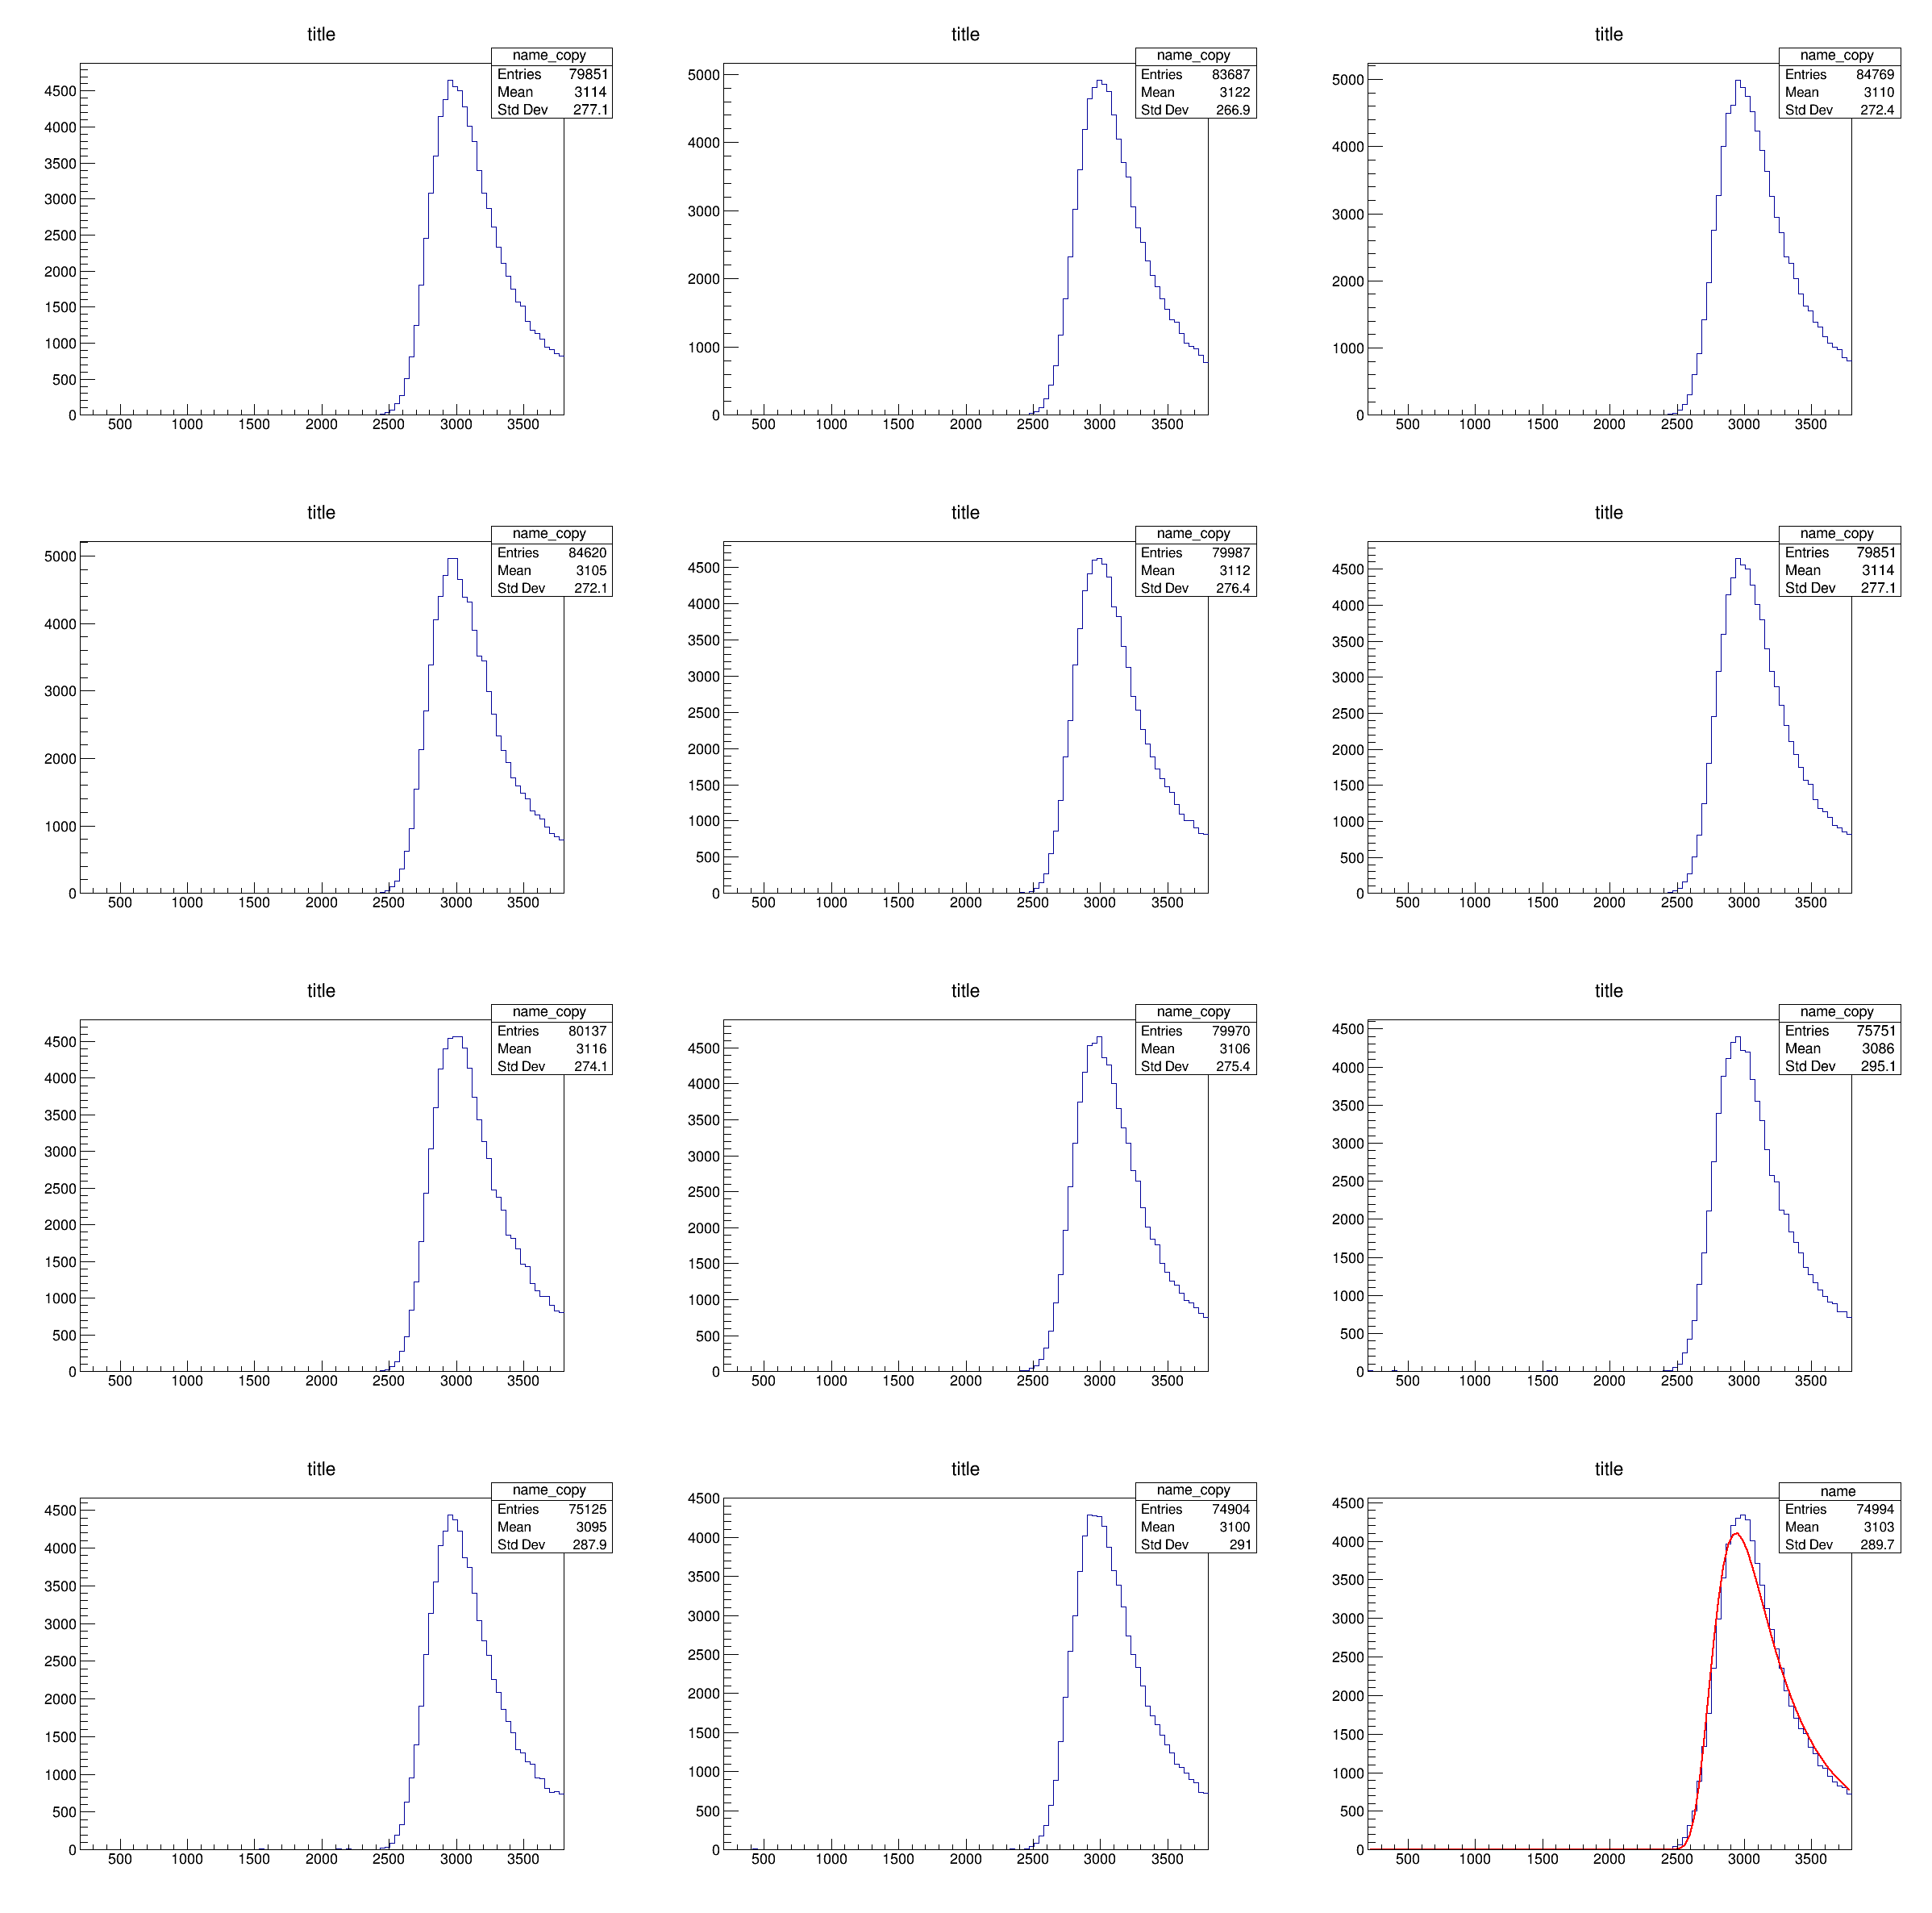

In [56]:
#Now we want to compare the way that the fitted MPV and the means vary over the different energies
import matplotlib.pyplot as plt

runNumbers=["1571933143", "1571931737", "1571932015", "1571932325", "1571932668", "1571933143", "1571933521", "1571933929", "1571934315", "1571934931", "1571935652", "1571936276", "1571936885", "1571937854", "1571938197", "1571938501", "1571938794", "1571939126", "1571939524", "1571939912", "1571950010", "1571950464", "1571950975", "1571951573", "1571952203", "1571952846", "1571953473"]

iterat=1
maxum=12

scintMeans=[]
holdScint=[]

fitti=TF1("fitti", "landau")

for run in runNumbers:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH1D("name", "title", 100, 200, 3800)

    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.Fit(fitti)

    holdScint+=[(fitti.GetParameter("MPV"), hist1.GetMean())] #store both the Landau MPV and mean to our hold
    if iterat%4==0:
        scintMeans+=[(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))] #and then calculate both their means and store it
        holdScint=[]
    iterat+=1
    if iterat>maxum:
        break
    
c1.Draw()
print(scintMeans)

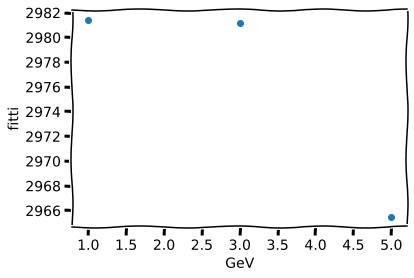

In [57]:
#Scatterplot of the Landau MPVs
with plt.xkcd():
    plt.scatter([1, 3, 5], [i[0] for i in scintMeans])
    plt.xlabel('GeV')
    plt.ylabel('fitti')

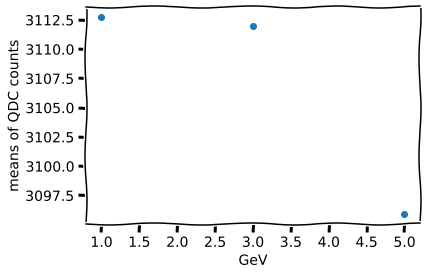

In [58]:
#Scatterplot of means
with plt.xkcd():
    plt.scatter([1, 3, 5], [i[1] for i in scintMeans])
    plt.xlabel('GeV')
    plt.ylabel('means of QDC counts')

[(1666.4206501727276, 1915.7091276970314), (1680.6012176210363, 1947.952928527059), (1687.7263440717525, 1966.946600389458)]
 FCN=2355.63 FROM MIGRAD    STATUS=CONVERGED     214 CALLS         215 TOTAL
                     EDM=1.80976e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.34621e+04   1.97956e+02   2.95039e+00   1.11699e-06
   2  MPV          1.66982e+03   6.42512e-01   1.43390e-02   3.64739e-04
   3  Sigma        1.07022e+02   4.05568e-01   8.70436e-06  -7.49271e-01
 FCN=2133.63 FROM MIGRAD    STATUS=CONVERGED     188 CALLS         189 TOTAL
                     EDM=4.17115e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.80430e+04   1.85229e

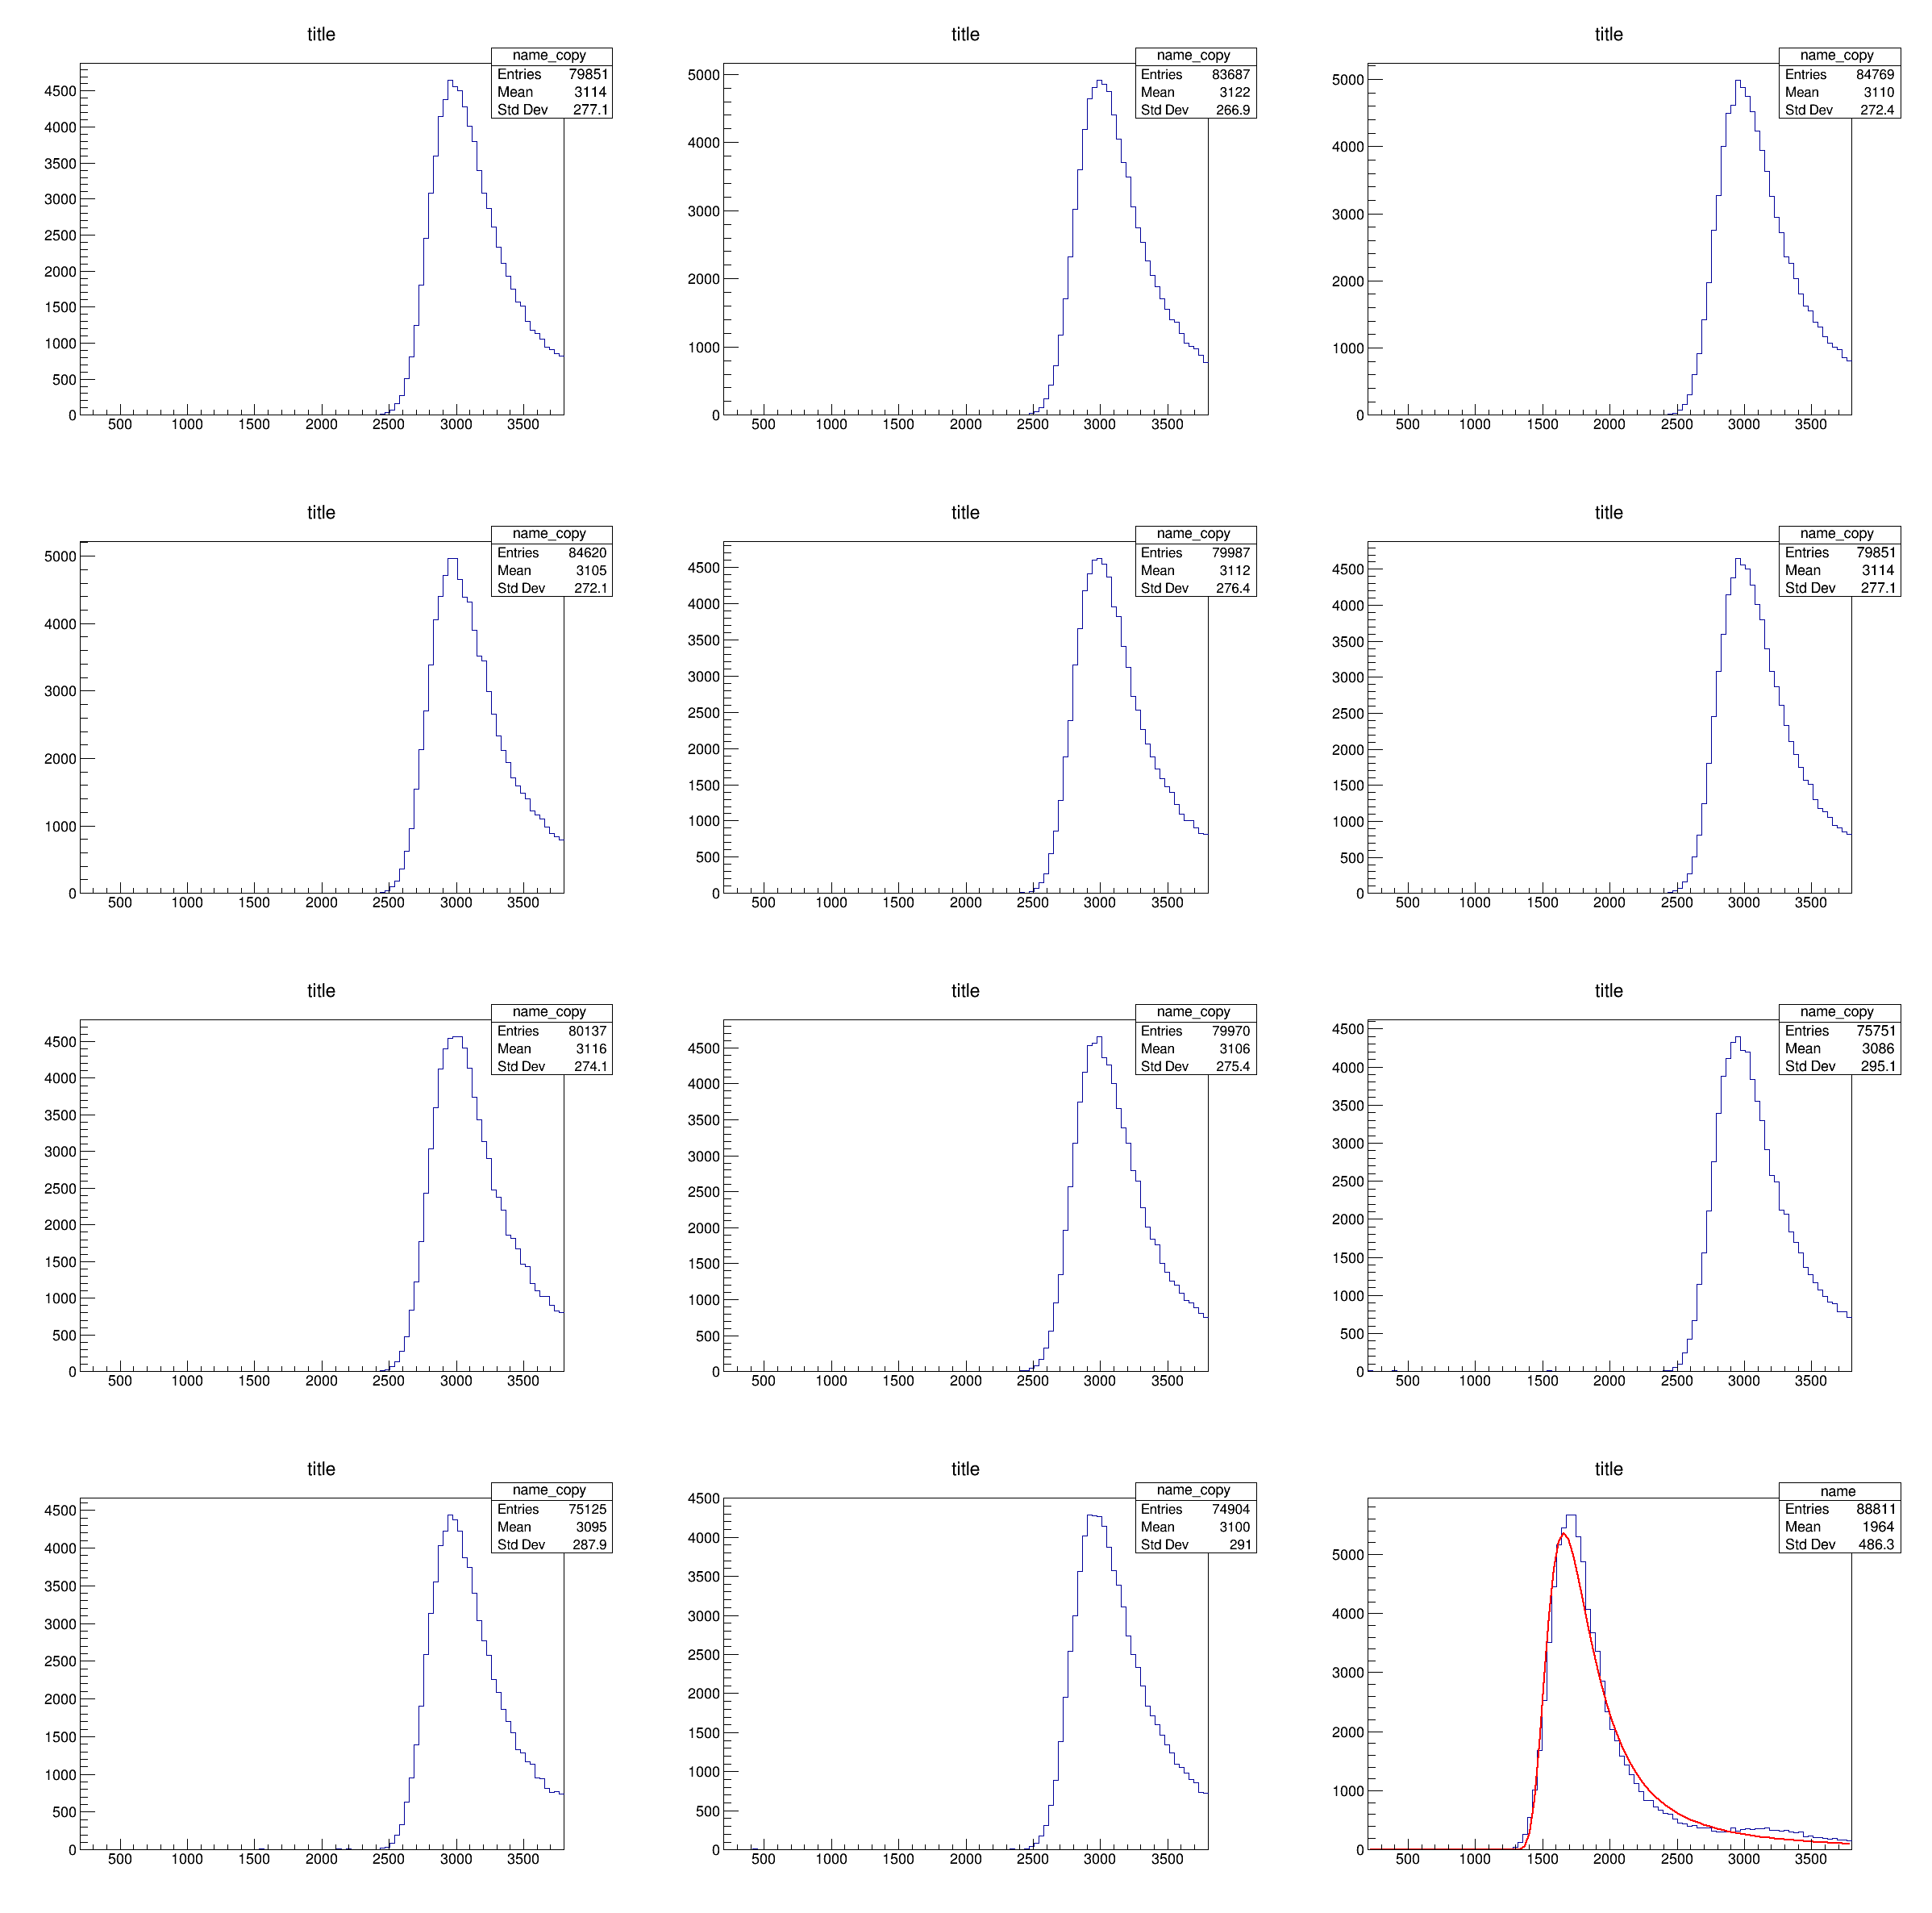

In [47]:
#Now to look at the graphs for the 0.5 cm scintillator. 
runNumbers=["1572006472", "1572006850", "1572007197",
            "1572004934", "1572005884", "1572007834",
            "1572003556", "1572002868", "1572004238"]
iterat=1
maxum=9

scintMeans=[]
holdScint=[]

fitti=TF1("fitti", "landau")

for run in runNumbers:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH1D("name", "title", 100, 200, 3800)

    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.Fit(fitti)

    holdScint+=[(fitti.GetParameter("MPV"), hist1.GetMean())] #store both the Landau MPV and mean to our hold
    if iterat%3==0:
        scintMeans+=[(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))] #and then calculate both their means and store it
        holdScint=[]
    iterat+=1
    if iterat>maxum:
        break
    
c1.Draw()
print(scintMeans)

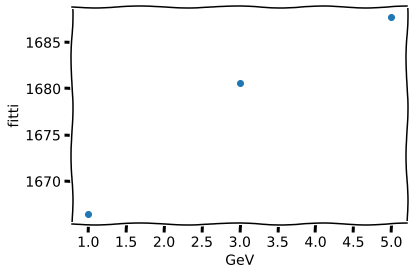

In [52]:
#Scatterplot of the Landau MPVs
with plt.xkcd():
    plt.scatter([1, 3, 5], [i[0] for i in scintMeans])
    plt.xlabel('GeV')
    plt.ylabel('fitti')

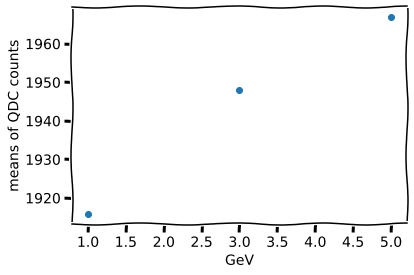

In [55]:
#Scatterplot of means
with plt.xkcd():
    plt.scatter([1, 3, 5], [i[1] for i in scintMeans])
    plt.xlabel('GeV')
    plt.ylabel('means of QDC counts')